<a href="https://colab.research.google.com/github/saerarawas/AAI_635O_B11_202520-Recommender-System/blob/main/Week1/Practical_Exercise_Age_Group_Popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Analyzing Customer Purchase Data by Age Group
In this exercise, you will analyze purchase data and visualize the most popular items for different age groups. Some parts of the code are missing. Your task is to complete the missing sections.

Instructions:
- Fill in the missing code sections marked as # FILL IN THE CODE.
- Read the comments carefully for guidance.

In [8]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define sample data
customer_ids = range(1, 101)  # 100 customers
descriptions = ['Shirt', 'Pants', 'Shoes', 'Hat', 'Socks', 'Jacket', 'Dress', 'Skirt', 'Tie', 'Belt']
quantities = np.random.randint(1, 6, size=1000)  # Quantities between 1 and 5
unit_prices = np.random.uniform(5, 50, size=1000)  # Prices between $5 and $50

# Create a DataFrame
data = {
    'CustomerID': np.repeat(customer_ids, 10),
    'Description': np.tile(descriptions, 100),
    'Quantity': quantities,
    'UnitPrice': unit_prices
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('data.csv', index=False)
print("data.csv created successfully!")

data.csv created successfully!


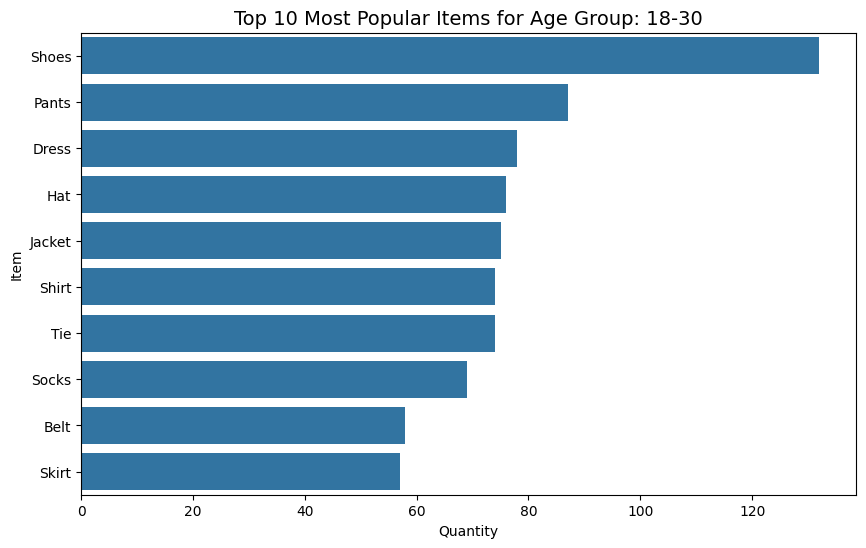

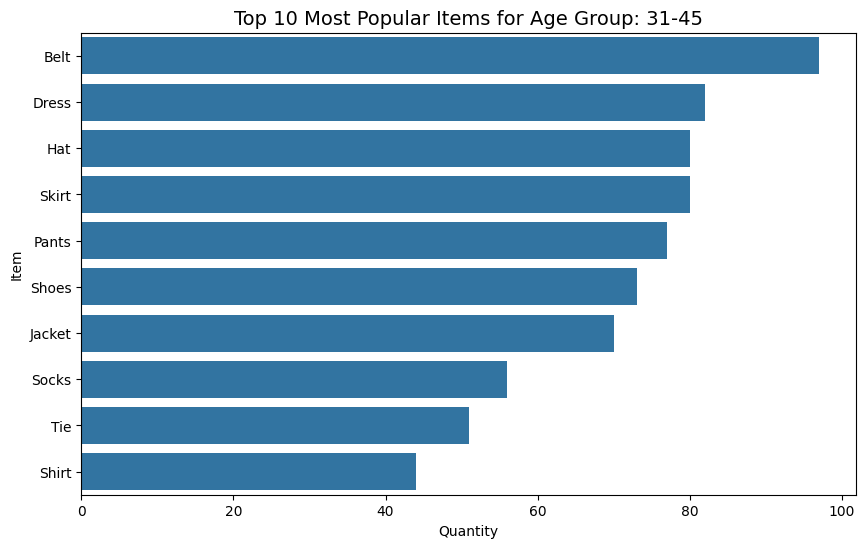

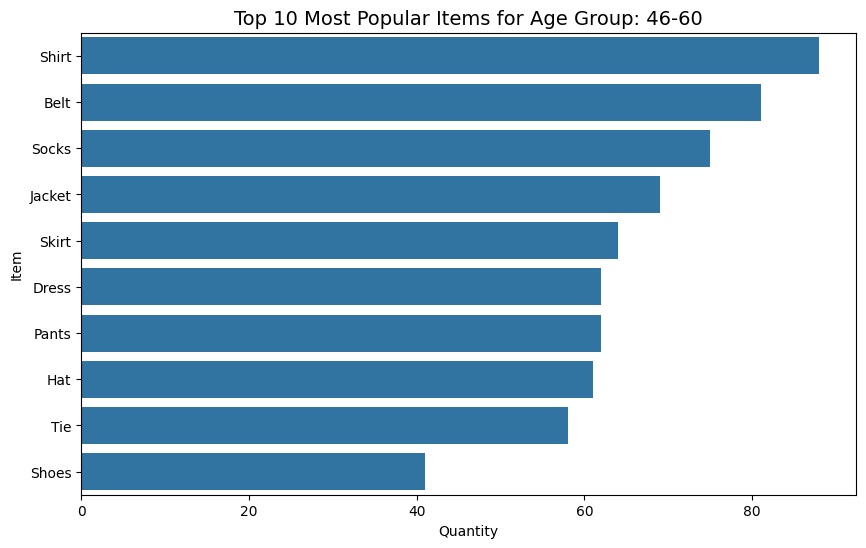

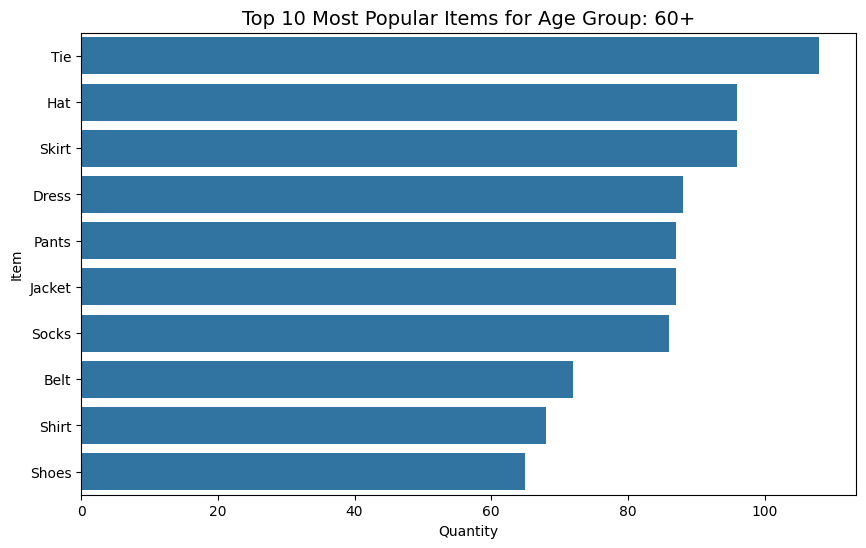

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Set a random seed for reproducibility
np.random.seed(40)

# Load the dataset
df = pd.read_csv('data.csv', encoding='unicode_escape')

# Create a list of age groups
age_groups = ['18-30', '31-45', '46-60', '60+']

# Set random seed for reproducibility
np.random.seed(42)

# Assign a random age group to each customer
df['Age Group'] = np.random.choice(age_groups, size=len(df))

# Group the data by 'Age Group' and 'Description', summing the 'Quantity'
age_grouped = df.groupby(['Age Group', 'Description'])['Quantity'].sum().reset_index()

# Function to plot the top 10 items for a given age group
def plot_top_10_items_by_age_group(age_group):
    # Filter data for the specific age group
    age_group_data = age_grouped[age_grouped['Age Group'] == age_group]

    # Sort data by 'Quantity' in descending order and get the top 10 items
    top_items = age_group_data.sort_values(by='Quantity', ascending=False).head(10)

    # Plot the top 10 items
    plt.figure(figsize=(10, 6))
    sns.barplot(y='Description', x='Quantity', data=top_items)
    plt.title(f'Top 10 Most Popular Items for Age Group: {age_group}', fontsize=14)
    plt.ylabel('Item')
    plt.xlabel('Quantity')
    plt.show()


# Plot the top 10 items for each age group
for age_group in age_groups:
    plot_top_10_items_by_age_group(age_group)